Exploratory Data Analysis

Roles to Explore:

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# -----------------------------------------------------
# Loading Data
# -----------------------------------------------------
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# -----------------------------------------------------
# Data Cleanup
# -----------------------------------------------------

# Convert job_posted_date to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')

# Convert job_skills from string -> Python list
# Only apply literal_eval when value is not NaN
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)

# Optional preview
df.head()


/opt/anaconda3/envs/luke/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
/opt/anaconda3/envs/luke/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


Filter for US Data Analyst roles

In [3]:
df_DA_US = df[(df['job_country'] == 'United States') &
              (df['job_title_short'] == 'Data Analyst')]


In [6]:
df_DA_US['job_location'].value_counts().head(10).to_frame()

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


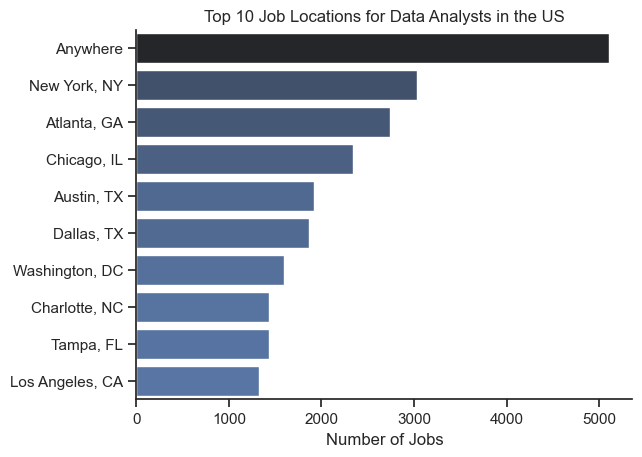

In [7]:
df_plot = (
    df_DA_US['job_location']
    .value_counts()
    .head(10)
    .to_frame(name='count')
    .reset_index()
    .rename(columns={'index': 'job_location'})
)

sns.set_theme(style='ticks')

sns.barplot(
    data=df_plot,
    x='count',
    y='job_location',
    hue='count',
    palette='dark:b_r',
    legend=False
)

sns.despine()
plt.title('Top 10 Job Locations for Data Analysts in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')   # hide y-axis label
plt.show()


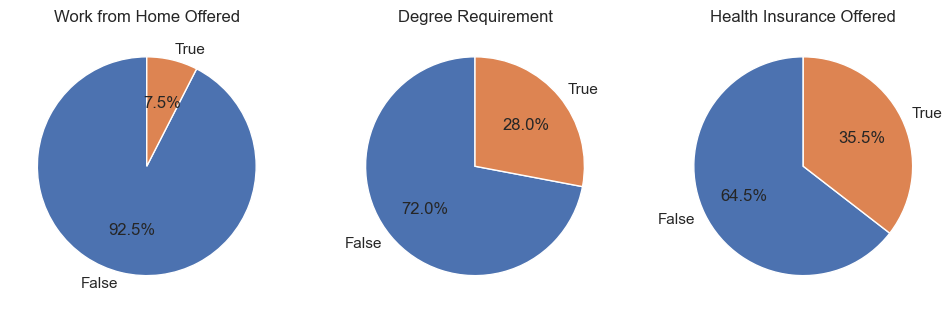

In [8]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    
    # Get value counts in correct order (False, True)
    values = df_DA_US[column].value_counts().reindex([False, True], fill_value=0)
    
    ax[i].pie(
        values,
        labels=['False', 'True'],
        autopct='%1.1f%%',
        startangle=90
    )
    
    ax[i].set_title(title)

# Optional subtitle
# plt.suptitle('Benefit Analysis of US Data Analyst Jobs', fontsize=16)

plt.show()


Companies to Explore

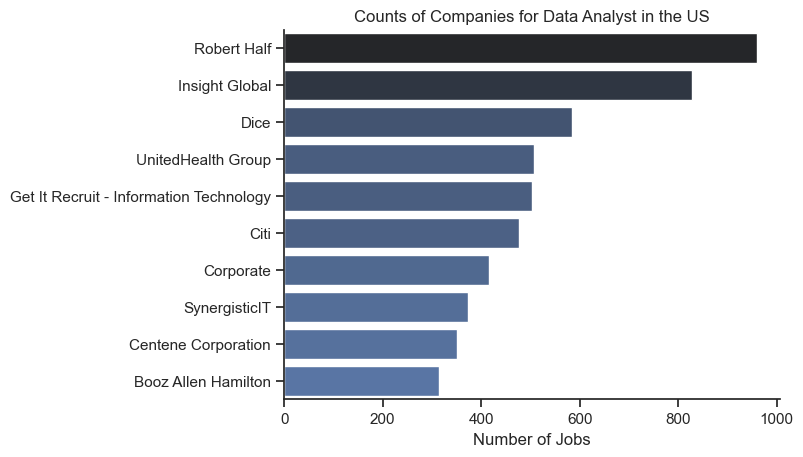

In [9]:
# Prepare plotting dataframe
df_plot = (
    df_DA_US['company_name']
        .value_counts()
        .head(10)
        .to_frame(name='count')          # rename column 0 -> count
        .reset_index()
        .rename(columns={'index': 'company_name'})
)

sns.set_theme(style="ticks")

sns.barplot(
    data=df_plot,
    x='count',
    y='company_name',
    hue='count',
    palette='dark:b_r',
    legend=False
)

sns.despine()

plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')   # hide y-axis label

plt.show()
